In [549]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings
filterwarnings('ignore')

In [550]:
df = pd.read_csv('SaratogaHouses.csv')

In [551]:
df.sample(5)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1587,281520,0.56,34,30800,2310,64,5,1,3.0,8,hot water/steam,gas,public/commercial,No,No,Yes
73,161000,0.31,10,10400,1542,52,3,0,2.5,5,hot air,gas,public/commercial,No,No,Yes
796,400000,0.60,9,57000,2897,63,4,2,2.5,12,hot air,gas,public/commercial,No,No,Yes
237,65000,0.16,19,15700,988,52,2,0,2.0,4,hot air,gas,public/commercial,No,No,No
922,202000,0.43,15,25000,1300,54,3,0,1.5,4,hot air,gas,septic,No,No,No


# Análisis exploratorio

## General

In [552]:
df.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [554]:
print('Number of rows and columns:', df.shape)
print('Number of duplicated rows:', df.duplicated().sum())
print('Number of missing values:', df.isnull().sum().sum())
    
print("-----------------------------------")
    
numeric_columns = df.select_dtypes(include=[np.number]).columns
print('Numeric columns:', list(numeric_columns))
categorical_columns = df.select_dtypes(include=[object]).columns
print('Categorical columns:', list(categorical_columns))
    
print("-----------------------------------")
    
if df.isnull().sum().sum() > 0:
    print('Columns with missing values:', df.isnull().sum())
if df.duplicated().sum() > 0:
    print('Duplicated rows:', df[df.duplicated()])

Number of rows and columns: (1728, 16)
Number of duplicated rows: 7
Number of missing values: 0
-----------------------------------
Numeric columns: ['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege', 'bedrooms', 'fireplaces', 'bathrooms', 'rooms']
Categorical columns: ['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']
-----------------------------------
Duplicated rows:        price  lotSize  age  landValue  livingArea  pctCollege  bedrooms   
898   131600     0.16   17      15100        1385          54         2  \
903   105000     0.16   20      15700         912          54         2   
904   122500     0.15   18      15100        1184          54         2   
910   188900     0.32   18      27000        1294          54         3   
914   126000     0.16   17      15600         908          54         2   
927   190000     0.59   15      25000        1300          54         3   
1692  212000     0.34   21      27000        1508          

In [555]:
df.drop_duplicates(inplace=True)

Simplemente eliminamos las filas duplicadas. No hay valores faltantes por lo que no hay necesidad de imputar valores. 

# Preprocesamiento de datos

## Outliers

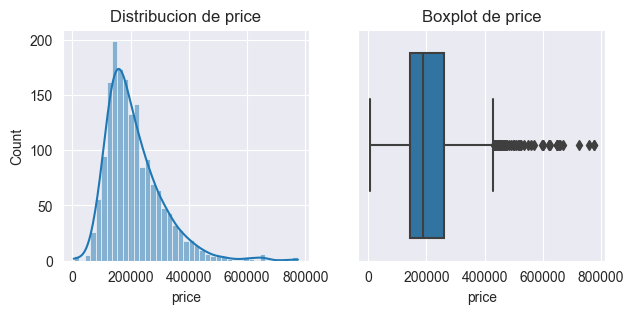

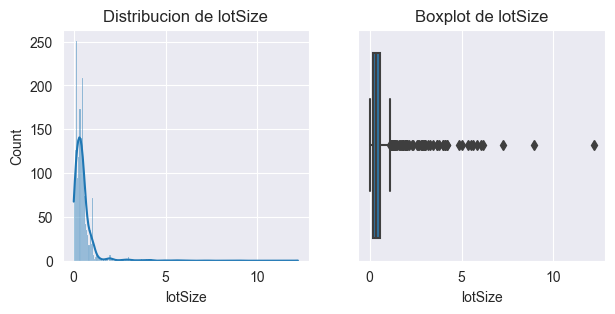

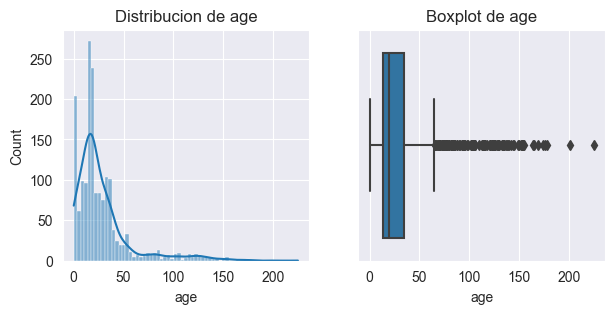

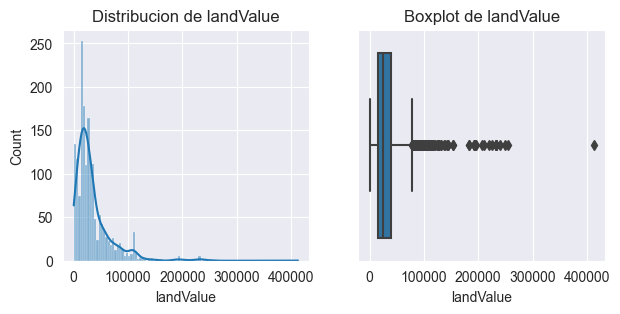

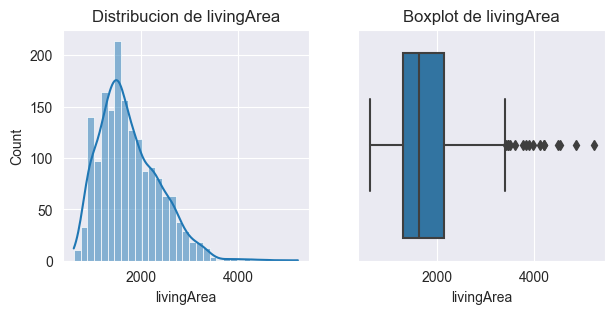

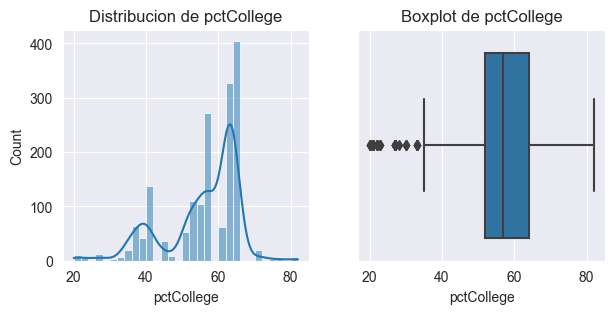

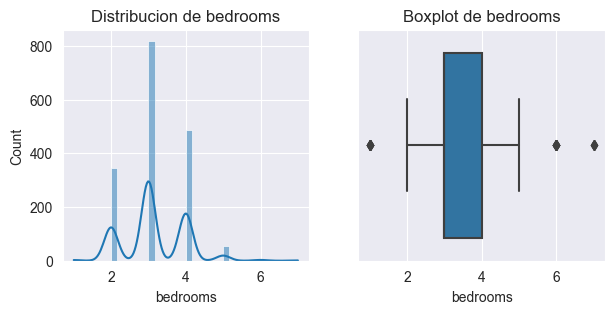

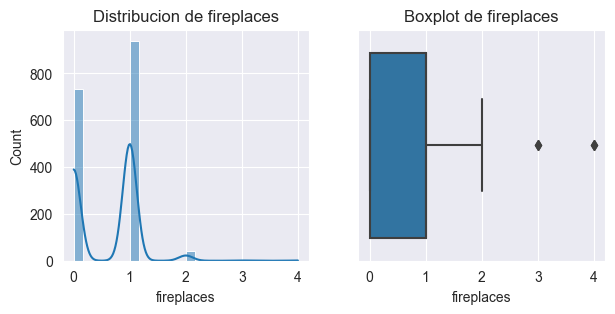

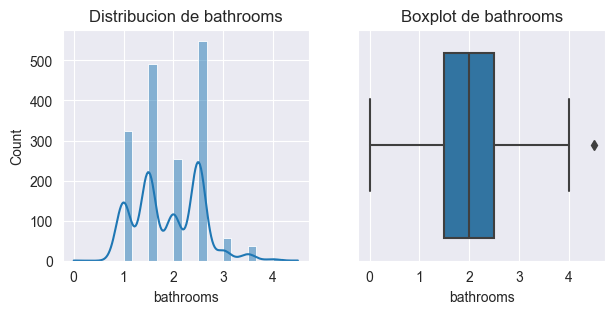

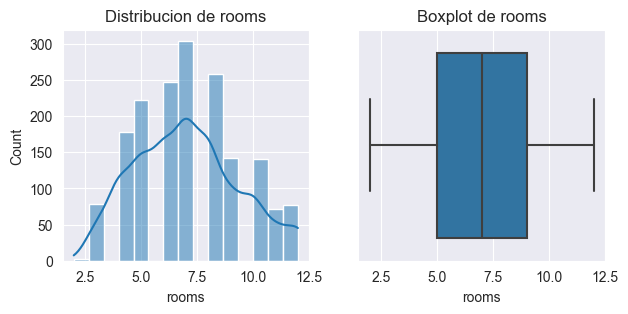

In [556]:
def distr_values(variable):
    fig, ax = plt.subplots(1, 2, figsize=(7, 3))

    ax[0].set_title(f"Distribucion de {variable}")
    sns.histplot(data=df, x=f"{variable}", kde=True, ax=ax[0])

    ax[1].set_title(f"Boxplot de {variable}")
    sns.boxplot(data=df, x=f"{variable}", ax=ax[1])


#apply distr_values to all numerical columns
for col in numeric_columns:
    distr_values(col)

In [557]:
def outliers_check_2(data, column): #Funcion para chequear los outliers "manualmente"
    top_max_values = data.nlargest(2, column)[column].values
    top_min_values = data.nsmallest(2, column)[column].values
    return print("The Top 2 Max", column, "are: ", top_max_values, "and the Top 2 Min", column, "are:", top_min_values)

outliers_check_2(df, 'age')
outliers_check_2(df, 'price')

The Top 2 Max age are:  [225 201] and the Top 2 Min age are: [0 0]
The Top 2 Max price are:  [775000 775000] and the Top 2 Min price are: [ 5000 10300]


Hay muchos outliers. Para que no afecten el modelo pero tampoco perder el peso de esos valores extremos, vamos a imputarlos con el percentil 5 y 95.

In [558]:
#A los outliers les imputamos el valor del percentil 1 y 99.

def imputar_outliers(data, column):
    q1 = data[column].quantile(0.05)
    q99 = data[column].quantile(0.95)
    data[column] = np.where(data[column] < q1, q1, data[column])
    data[column] = np.where(data[column] > q99, q99, data[column])
    return data

columnas_con_outliers = ['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege']
for col in columnas_con_outliers:
    df = imputar_outliers(df, col)

outliers_check_2(df, 'age')
outliers_check_2(df, 'price') #Efectivamente, los outliers han sido imputados

The Top 2 Max age are:  [95. 95.] and the Top 2 Min age are: [1. 1.]
The Top 2 Max price are:  [395000. 395000.] and the Top 2 Min price are: [97000. 97000.]


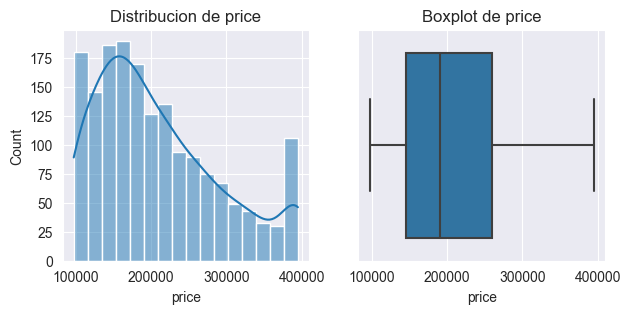

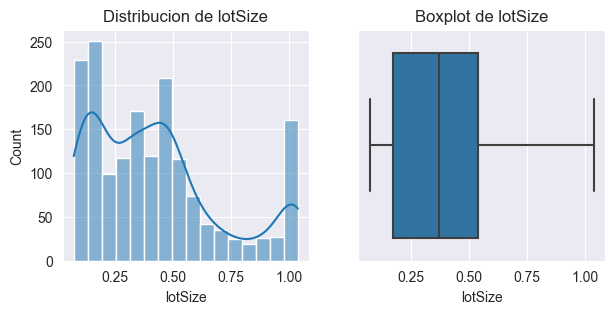

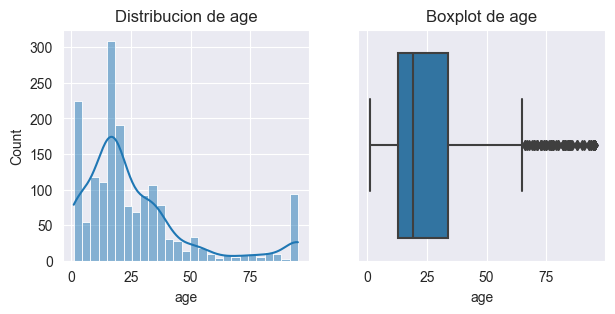

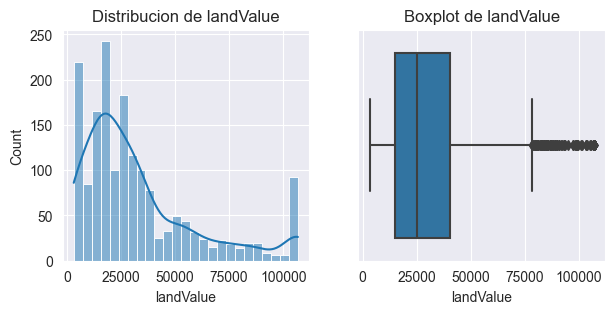

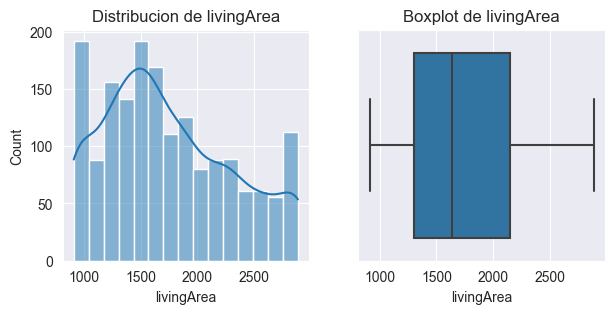

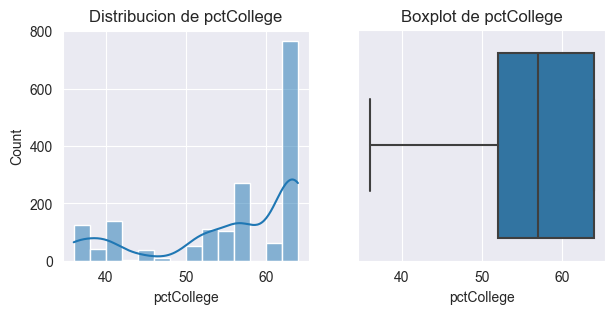

In [559]:
for col in columnas_con_outliers:
    distr_values(col)
    
# Para determinar si fue suficiente vemos las distribuciones de las variables ahora

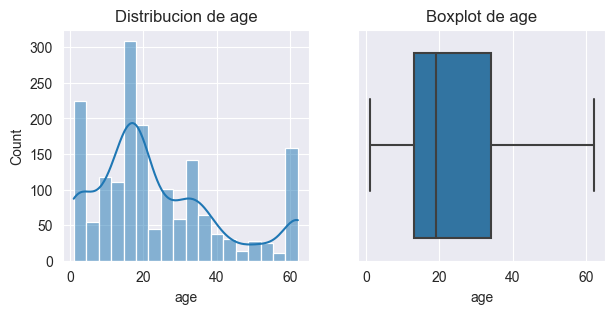

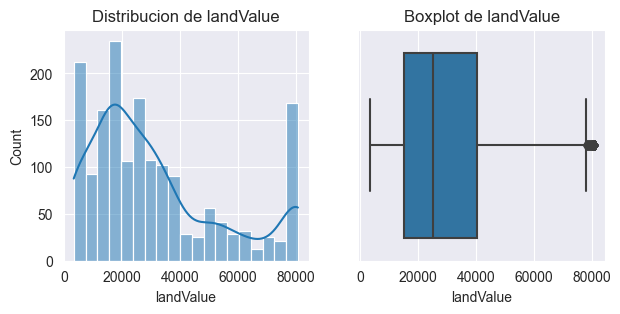

In [560]:
columnas_siguen_con_outliers = ['age', 'landValue'] #Estas columnas siguen con outliers

def imputar_outliers_exigente(data, column):
    q90 = data[column].quantile(0.91)
    data[column] = np.where(data[column] > q90, q90, data[column])
    return data

for col in columnas_siguen_con_outliers:
    df = imputar_outliers_exigente(df, col)
    
for col in columnas_siguen_con_outliers:
    distr_values(col)

Como vimos en los graficos de distribucion y caja, hay outliers presentes en muchas variables. Como eran demasiados, la decision correcta no hubiese sido eliminarlos porque se hubiese perdido mucha informacion. Por eso, decidimos imputar los outliers con el percentil 5 y 95. Luego, vimos que aun quedaban outliers en las variables 'age' y 'landValue', por lo que decidimos ser mas exigentes y tomar el percentil 91.

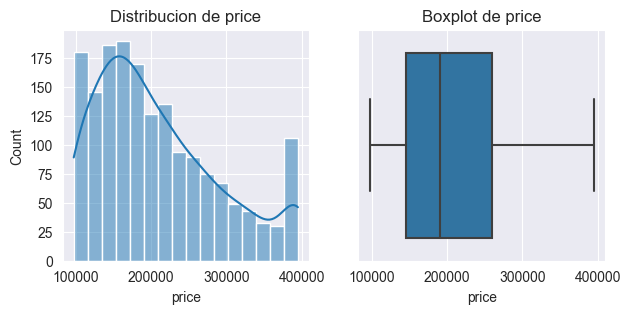

In [561]:
distr_values('price')

En cuanto a la variable objetivo, si bien vemos que hay una distribucion asimetrica, tiene una distribucion mucho mas razonable que sin el tratamiento de los outliers.

## Correlaciones

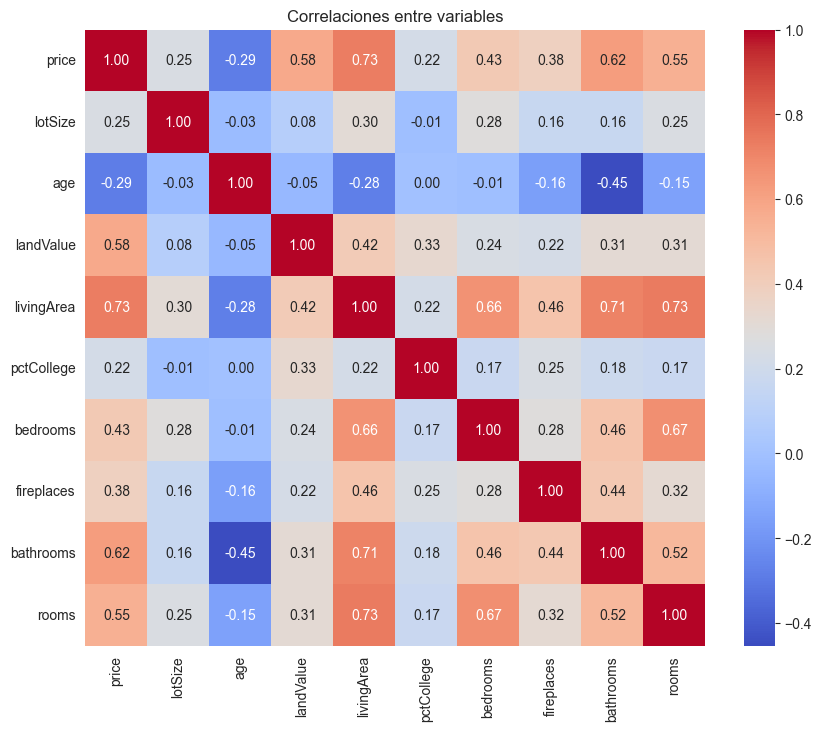

In [562]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones entre variables')
plt.show()

Todas las variables tienen cierta correlación (superior a |0.20|) con la variable objetivo en cierto punto. No es óptimo sacar ninguna variable por ahora.

## Encoding

In [563]:
from sklearn.preprocessing import OneHotEncoder
df[categorical_columns].head()

,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,electric,electric,septic,No,No,No
1,hot water/steam,gas,septic,No,No,No
2,hot water/steam,gas,public/commercial,No,No,No
3,hot air,gas,septic,No,No,No
4,hot air,gas,public/commercial,No,Yes,Yes


In [564]:
#value counts de cols categoricas
for col in categorical_columns:
    print(df[col].value_counts())

heating
hot air            1120
hot water/steam     302
electric            299
Name: count, dtype: int64
fuel
gas         1196
electric     309
oil          216
Name: count, dtype: int64
sewer
public/commercial    1207
septic                502
none                   12
Name: count, dtype: int64
waterfront
No     1706
Yes      15
Name: count, dtype: int64
newConstruction
No     1640
Yes      81
Name: count, dtype: int64
centralAir
No     1087
Yes     634
Name: count, dtype: int64


A las variables waterfont, newConstruction y centralAir les asignamos valores numericos. Asumiendo que YES (1) es mejor que NO (0) para estos casos. Al resto, ademas de tener mas de dos categorias, no les podemos asignar cierta ordenalidad, por lo que vamos a hacer onehotencoding.

In [565]:
df['waterfront'] = df['waterfront'].map({'No': 0, 'Yes': 1})
df['newConstruction'] = df['newConstruction'].map({'No': 0, 'Yes': 1})
df['centralAir'] = df['centralAir'].map({'No': 0, 'Yes': 1})

columnas_para_encoding = ['heating', 'fuel', 'sewer']

In [566]:
#a las columnas para encoding, les aplicamos onehotencoder
cols_nuevas = 0
for column in columnas_para_encoding:
  print("There are", len(df[column].unique()), "unique values for column", column ,". These values are:", df[column].unique())
  cols_nuevas += len(df[column].unique())
  
print(f'\nDespues del OneHotEncoding deberiamos tener {df.shape[1] + cols_nuevas - len(columnas_para_encoding)} columnas.')

There are 3 unique values for column heating . These values are: ['electric' 'hot water/steam' 'hot air']
There are 3 unique values for column fuel . These values are: ['electric' 'gas' 'oil']
There are 3 unique values for column sewer . These values are: ['septic' 'public/commercial' 'none']

Despues del OneHotEncoding deberiamos tener 22 columnas.


In [567]:
def onehot_encode(data, cat_vars):
    # Creamos un objeto OneHotEncoder
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

    # Creamos un dataframe vacío donde guardaremos los datos codificados
    encoded_data = pd.DataFrame()

    # Para cada variable categórica, realizamos el one-hot encoding y lo agregamos al dataframe
    for var in cat_vars:
        # Codificamos la variable
        encoded_var = ohe.fit_transform(data[var].values.reshape(-1, 1))
        # Generamos los nombres de las nuevas columnas
        cols = [var + '_' + str(category) for category in ohe.categories_[0]]
        # Creamos un dataframe con las variables codificadas y las nuevas columnas
        encoded_var_df = pd.DataFrame(encoded_var, columns=cols)
        # Agregamos el dataframe generado al dataframe de datos codificados
        encoded_data = pd.concat([encoded_data, encoded_var_df], axis=1)

    # Eliminamos las columnas originales que fueron codificadas
    data = data.drop(columns=cat_vars)

    # Agregamos el dataframe de datos codificados al dataframe original
    data = pd.concat([data, encoded_data], axis=1)

    return data

df = onehot_encode(df, columnas_para_encoding)

print(f'\nDespues del OneHotEncoding tenemos {df.shape[1]} columnas.')


Despues del OneHotEncoding tenemos 22 columnas.


# Modelado

In [568]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#replace missing values with 0
df = df.fillna(0)

X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dividimos el dataset en train y test para evaluar. Vamos a correr tres modelos: regresion lineal, xgboost y lightgbm. Para cada modelo vamos a hacer un pipeline con un std_scaler y un gridsearch para optimizar los hiperparametros en caso de que haya.

In [569]:
# Quiero usar un pipeline, en donde se estandaricen las variables numericas y se pueda elegir que modelo correr.

def model_pipeline(model, parameters):
    pipeline = Pipeline(steps = [('scaler', StandardScaler()), ('regressor', model)])
    
    grid = GridSearchCV(pipeline, parameters, cv=5, scoring='r2', verbose=1)
    grid.fit(X_train, y_train)
    
    print(f"Best parameters: {grid.best_params_}")
    print(f"Train R2: {grid.best_score_}")
    
    best_model = grid.best_estimator_
    
    return best_model

## Regresion Lineal

In [570]:
parameters = {} #No hay hiperparametros para optimizar en una regresion lineal

linear_model = model_pipeline(LinearRegression(), parameters)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {}
Train R2: 0.6749505826833372


## Xgboost regression

In [571]:
#import from sklearn xgboost regressor
from xgboost import XGBRegressor

parameters = {
    'regressor__reg_alpha': [0.4,0.7],
    'regressor__n_estimators': [10, 100],
    'regressor__max_depth': [1, 5, 10],
    'regressor__learning_rate': [0.01, 0.1, 0.2]
}

xgboost_model = model_pipeline(XGBRegressor(), parameters)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 100, 'regressor__reg_alpha': 0.7}
Train R2: 0.7234419240648512


## LightGBM regression

In [572]:
from lightgbm import LGBMRegressor

parameters = {
    'regressor__n_estimators': [10, 100,200],
    'regressor__max_depth': [1, 5,10],
    'regressor__learning_rate': [0.01, 0.1, 0.2]
}#Probe con una regularizacion como en xgboost pero no mejoro el modelo.
# Los saque porque alargaba demasiado el tiempo de computo.

lightgbm_model = model_pipeline(LGBMRegressor(), parameters)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 1105, number of used features: 19
[LightGBM] [Info] Start training from score 207855.812670
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 1105, number of used features: 19
[LightGBM] [Info] Start training from score 206822.005430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tota

# Metricas

Con el fin de determinar que modelo es mejor, vamos a evaluarlos con las metricas de R2, MSE y MAE. Prestando especial atención a dos puntos. Uno el valor de R2, que es para este problema (asignacion de precios) la metrica mas importante y la diferencia entre los valores de train y test, que nos va a dar una idea de si el modelo esta overfitteando o no.

In [573]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

resultados_modelos = {}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # I want to evalueate both the train and test R2, mean squared error and mean absolute error

    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    
    train_mae = mean_absolute_error(y_train, model.predict(X_train))
    test_mae = mean_absolute_error(y_test, model.predict(X_test))
    
    #Add the results to a dictionary
    #make key shorter
    resultados_modelos[model] = {'train_r2': train_r2, 'test_r2': test_r2, 'train_mse': train_mse, 'test_mse': test_mse, 'train_mae': train_mae, 'test_mae': test_mae}


In [574]:
evaluate_model(linear_model, X_train, X_test, y_train, y_test)
evaluate_model(xgboost_model, X_train, X_test, y_train, y_test)
evaluate_model(lightgbm_model, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 1382, number of used features: 19
[LightGBM] [Info] Start training from score 207177.764834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [575]:
df_resultados = pd.DataFrame(resultados_modelos).T
df_resultados.index = ['Linear Regression', 'XGBoost', 'LightGBM']

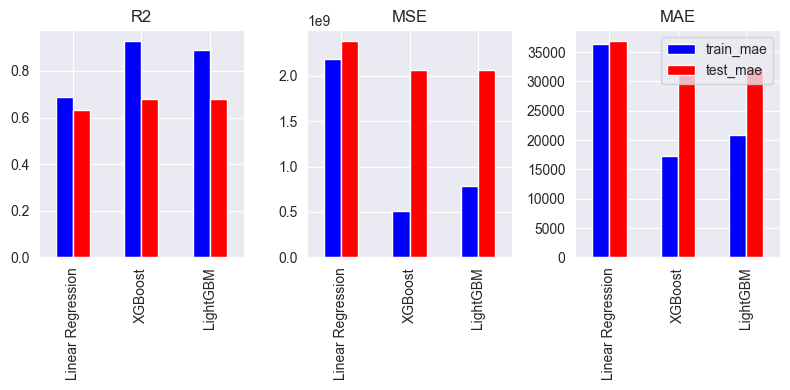

In [576]:
#plot the results. Barh plot with differences between train and test
#make 3 horizontal bar plots, subplots
fig, ax = plt.subplots(1, 3, figsize=(8, 4))

#Add one legend for all subplots
df_resultados[['train_r2', 'test_r2']].plot(kind='bar', ax=ax[0], color=['blue', 'red'])
ax[0].get_legend().remove()
ax[0].set_title('R2')

df_resultados[['train_mse', 'test_mse']].plot(kind='bar', ax=ax[1], color=['blue', 'red'])
ax[1].get_legend().remove()
ax[1].set_title('MSE')

df_resultados[['train_mae', 'test_mae']].plot(kind='bar', ax=ax[2], color=['blue', 'red'])
#ax[2].get_legend().remove()
ax[2].set_title('MAE')

plt.tight_layout()
plt.show()

# Conclusiones

El modelo que considero óptimo para la solución de predicción de precios en este caso es la **regresión lineal**. Aunque los modelos de XGBoost y LightGBM tienen un R2 más alto, la diferencia de las metricas entre el train y test es mucho mayor en estos modelos. La regresión lineal tiene un R2 más bajo, pero la diferencia entre train y test es mucho menor, por lo que está generalizando mejor. Para un dataset simple y relativamente chico (1700 registros) los modelos de xgboost y lightgbm tienen un riesgo de sobreajuste considerable.
Por esto y porque las diferencias en R2 no son tan grandes, elijo la regresión lineal.